**Question 7 -**<br>
Using the data from **Question 4**, write code to analyze the data and answer the following questions **Note -**
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

**Insights to be drawn -**
<br>● Get all the Earth meteorites that fell before the year 2000
<br>● Get all the earth meteorites co-ordinates who fell before the year 1970
<br>● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

**Ans**

In [1]:
# importing necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Read the meteorite data from a CSV file
df = pd.read_csv('/content/sample_data/nasa_data.csv')

In [3]:
df.head()

,Name of Earth Meteorite,ID of Earth Meteorite,Name Type,Recclass,Mass of Earth Meteorite,Year,Latitude,Longitude,Point Coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"[50, 6]"
1,Aarhus,2,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"[56, 10]"
2,Abee,6,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"[54, -113]"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"[16, -99]"
4,Achiras,370,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"[-33, -64]"


In [5]:
# Custom date parser to handle out-of-bounds timestamps
def date_parser(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d')
    except ValueError:
        return pd.NaT  # Return NaT (Not a Time) for out-of-bounds timestamps

In [6]:
# Read the meteorite data from a CSV file with custom date parser
df = pd.read_csv('/content/sample_data/nasa_data.csv', parse_dates=['Year'], date_parser=date_parser)

In [7]:
df.head()

,Name of Earth Meteorite,ID of Earth Meteorite,Name Type,Recclass,Mass of Earth Meteorite,Year,Latitude,Longitude,Point Coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01,50.77500,6.08333,"[50, 6]"
1,Aarhus,2,Valid,H6,NaN,1951-01-01,56.18333,10.23333,"[56, 10]"
2,Abee,6,Valid,EH4,NaN,1952-01-01,54.21667,-113.00000,"[54, -113]"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01,16.88333,-99.90000,"[16, -99]"
4,Achiras,370,Valid,L6,NaN,1902-01-01,-33.16667,-64.95000,"[-33, -64]"


In [8]:
# Get all the Earth meteorites that fell before the year 2000
meteorites_before_2000 = df[df['Year'].dt.year < 2000]

In [9]:
# Get all the Earth meteorites' coordinates that fell before the year 1970
coordinates_before_1970 = meteorites_before_2000[['Latitude', 'Longitude']]

In [12]:
# Get all the Earth meteorites with a mass greater than 10,000 kg
mass_greater_than_10000kg = df[df['Mass of Earth Meteorite'] > 10000]

In [13]:
mass_greater_than_10000kg

,Name of Earth Meteorite,ID of Earth Meteorite,Name Type,Recclass,Mass of Earth Meteorite,Year,Latitude,Longitude,Point Coordinates


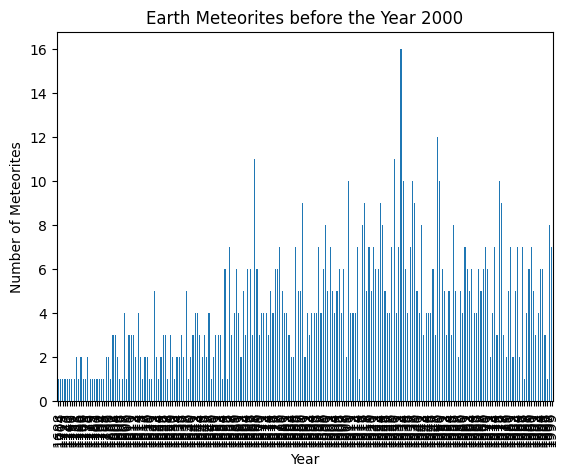

In [14]:
# Plotting the data

# Plot 1: Earth meteorites before the year 2000
year_counts = meteorites_before_2000['Year'].dt.year.value_counts().sort_index()
year_counts.plot(kind='bar', xlabel='Year', ylabel='Number of Meteorites', title='Earth Meteorites before the Year 2000')
plt.show()

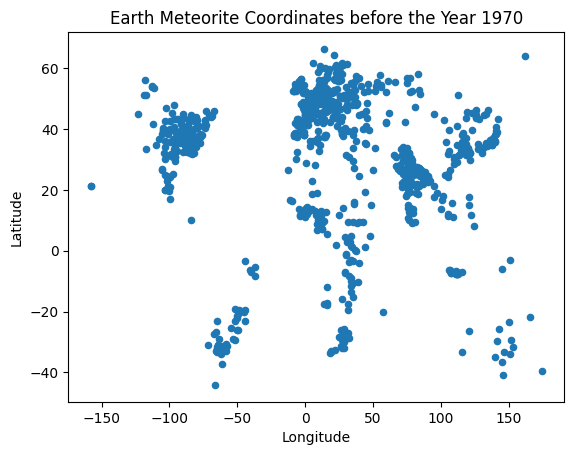

In [15]:
# Plot 2: Earth meteorite coordinates before the year 1970
coordinates_before_1970.plot(kind='scatter', x='Longitude', y='Latitude', xlabel='Longitude', ylabel='Latitude', title='Earth Meteorite Coordinates before the Year 1970')
plt.show()